In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from random import randint

In [46]:
def constFunc(values):
    ans = 0
    idealWeights = [0.3,0.1,-0.8,0.3,1.2]
    for i in range(len(values)):
        ans += values[i]*idealWeights[i]
    return ans+1

In [45]:
# Creating fake dataset with a simple function, meant to compare final values

x = []
y = []

for samples in range(10):
    values = []
    for attribute in range(5):
        values.append(randint(0,100)/100.0)
    x.append(values)
    y.append(constFunc(values))
print(x,len(x))
print(y,len(y))

[[0.75, 0.02, 0.37, 0.12, 0.32], [0.55, 0.4, 0.05, 0.06, 0.62], [0.94, 0.38, 0.8, 0.64, 0.62], [0.3, 0.51, 0.46, 0.17, 0.99], [0.61, 0.15, 0.51, 0.07, 0.51], [0.97, 0.1, 0.45, 0.61, 0.63], [0.16, 0.66, 0.17, 0.0, 0.56], [0.52, 0.39, 0.04, 0.63, 0.76], [0.31, 0.52, 0.39, 0.76, 0.91], [0.25, 0.48, 0.3, 0.37, 0.36]] 10
[0.351, 0.927, 0.6159999999999999, 1.012, 0.42299999999999993, 0.8799999999999999, 0.65, 1.2639999999999998, 1.153, 0.426] 10


In [48]:
model = Sequential()
model.add(Dense(1, input_shape = (5,)))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.weights

[<tf.Variable 'dense_1/kernel:0' shape=(5, 1) dtype=float32, numpy=
 array([[-0.96826124],
        [ 0.8586178 ],
        [-0.4334526 ],
        [ 0.4019413 ],
        [-0.29141665]], dtype=float32)>,
 <tf.Variable 'dense_1/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]

In [53]:
inp = np.array(x[0], dtype = np.float32)
print(inp.shape)
model.predict(x)

(5,)


array([[0.50195426],
       [0.7218475 ],
       [1.1793672 ],
       [0.6737041 ],
       [0.4611612 ],
       [1.0694453 ],
       [0.58644414],
       [1.1352798 ],
       [1.1263335 ],
       [0.72769725]], dtype=float32)

In [55]:
model.compile(optimizer = 'adam', loss = 'mse')
model.fit(x,y)

1/1 [==============================] - 0s 3ms/step - loss: 0.0646


In [56]:
model.predict(x)

array([[0.49937454],
       [0.7191681 ],
       [1.174988  ],
       [0.67027503],
       [0.45831165],
       [1.0656859 ],
       [0.5838949 ],
       [1.1319405 ],
       [1.1224444 ],
       [0.7249378 ]], dtype=float32)

In [57]:
model.weights

[<tf.Variable 'dense_22/kernel:0' shape=(5, 1) dtype=float32, numpy=
 array([[ 0.60095733],
        [ 0.6961933 ],
        [-0.25221017],
        [ 0.73194474],
        [ 0.12880333]], dtype=float32)>,
 <tf.Variable 'dense_22/bias:0' shape=(1,) dtype=float32, numpy=array([-0.00099997], dtype=float32)>]

In [68]:
weightMatrix = []
weightMatrix.append(np.array(model.get_weights()))

In [81]:
print(weightMatrix[0])
for i in weightMatrix[0]:
    print(i)
    ar = np.array(i)
    for j in ar:
        print(j)
        print()
#     print()


[array([[ 0.60095733],
       [ 0.6961933 ],
       [-0.25221017],
       [ 0.73194474],
       [ 0.12880333]], dtype=float32)
 array([-0.00099997], dtype=float32)]
[[ 0.60095733]
 [ 0.6961933 ]
 [-0.25221017]
 [ 0.73194474]
 [ 0.12880333]]
[0.60095733]

[0.6961933]

[-0.25221017]

[0.73194474]

[0.12880333]

[-0.00099997]
-0.0009999672



In [47]:
# Creating fake dataset with a simple function, meant to compare final values

x = []
y = []

for samples in range(1000000):
    values = []
    for attribute in range(5):
        values.append(randint(0,90000000)/90000000.0)
    x.append(values)
    y.append(constFunc(values))
print(len(x))
print(len(y))

1000000
1000000


In [49]:
model.compile(optimizer = 'adam', loss = 'mse')
trackingArray = []
for i in range(0,100000,100):
    model.fit(x[i:i+100],y[i:i+100])
    trackingArray.append(np.array(model.get_weights()))
# trackingArray = np.asarray(trackingArray)
# print(trackingArray.shape)
print(len(trackingArray))

4/4 [==============================] - 0s 1ms/step - loss: 0.2936


4/4 [==============================] - 0s 1ms/step - loss: 0.0438


4/4 [==============================] - 0s 866us/step - loss: 0.0414


4/4 [==============================] - 0s 988us/step - loss: 0.0235


4/4 [==============================] - 0s 917us/step - loss: 0.0197


4/4 [==============================] - 0s 1ms/step - loss: 0.0124


4/4 [==============================] - 0s 952us/step - loss: 0.0091


4/4 [==============================] - 0s 1ms/step - loss: 0.0051


4/4 [==============================] - 0s 990us/step - loss: 0.0042
1000


In [50]:
print(model.predict(x[:10]))
print("\n\n\n\n\n",y[:10])

[[2.0830119 ]
 [1.8192592 ]
 [1.2969738 ]
 [2.4090652 ]
 [0.75944465]
 [1.3966138 ]
 [2.1657228 ]
 [1.588148  ]
 [1.5751402 ]
 [2.3678968 ]]





 [2.0665299655555556, 1.775346762222222, 1.24222407, 2.392248091111111, 0.695047661111111, 1.476041122222222, 2.148008661111111, 1.7168579322222222, 1.5998134377777777, 2.2293609844444444]


In [51]:
print(trackingArray[-1])
print("ideal:", [0.3,0.1,-0.8,0.3,1.2])

[array([[ 0.426743  ],
       [ 0.23643403],
       [-0.6831767 ],
       [ 0.39999005],
       [ 1.2378359 ]], dtype=float32)
 array([0.72643805], dtype=float32)]
ideal: [0.3, 0.1, -0.8, 0.3, 1.2]


In [52]:
npTA = np.array(trackingArray)

In [53]:
# attribute1 = npTA[:,0,0]
# print(attribute1.shape)
# print(attribute1[:10])
a1 = []
for i in range(int(npTA.shape[0])):
    a1.append(float(npTA[i][0][0]))
print(len(a1))
print(a1[:10])

1000
[0.20001086592674255, 0.20397984981536865, 0.2079329937696457, 0.21188142895698547, 0.21586668491363525, 0.2199070304632187, 0.2238459587097168, 0.22776851058006287, 0.2316722869873047, 0.23550689220428467]


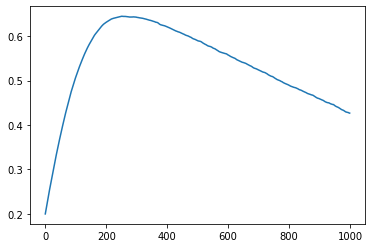

In [54]:
import matplotlib.pyplot as plt
plt.plot(a1)

In [55]:
a2 = []
for i in range(int(npTA.shape[0])):
    a2.append(float(npTA[i][0][1]))
print(len(a2))
print(a2[:10])

1000
[0.060624007135629654, 0.06459254026412964, 0.06852748990058899, 0.07245884090662003, 0.07632482051849365, 0.08011921495199203, 0.08392675966024399, 0.08776918053627014, 0.09159928560256958, 0.09552765637636185]


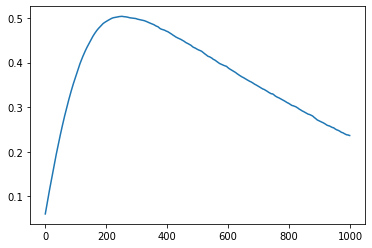

In [56]:
plt.plot(a2)

1000
[-0.9766722917556763, -0.9727436304092407, -0.9687449932098389, -0.9647655487060547, -0.9608072638511658, -0.9569001197814941, -0.9529936909675598, -0.9490902423858643, -0.9452959299087524, -0.9414734840393066]


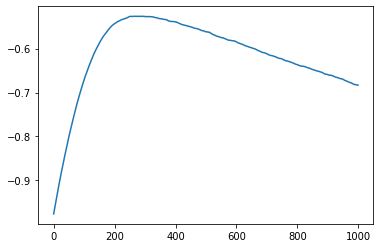

In [57]:
a3 = []
for i in range(int(npTA.shape[0])):
    a3.append(float(npTA[i][0][2]))
print(len(a3))
print(a3[:10])
plt.plot(a3)

1000
[0.0039986250922083855, 0.0079940902069211, 0.01198666449636221, 0.01597517728805542, 0.019960105419158936, 0.023916639387607574, 0.027829281985759735, 0.0317268893122673, 0.03560873121023178, 0.039459358900785446]


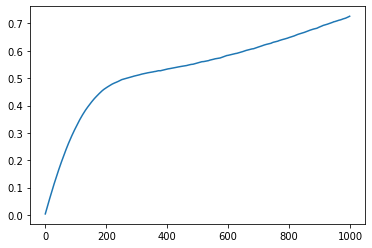

In [58]:
bias = []
for i in range(int(npTA.shape[0])):
    bias.append(float(npTA[i][1][0]))
print(len(bias))
print(bias[:10])
plt.plot(bias)

In [45]:
print(model.get_weights())
print("ideal weights:{}, bias = 1".format([0.3,0.1,-0.8,0.3,1.2]))

[array([[ 0.7656801 ],
       [ 0.6621779 ],
       [-0.26780492],
       [ 0.8252213 ],
       [ 1.6802437 ]], dtype=float32), array([3.6600232], dtype=float32)]
ideal weights:[0.3, 0.1, -0.8, 0.3, 1.2], bias = 1
